

**Data Dictionary**

- Booking_ID: unique identifier of each booking
- no_of_adults: Number of adults
- no_of_children: Number of Children
- no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
- no_of_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
- type_of_meal_plan: Type of meal plan booked by the customer
- required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)
- room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.
- lead_time: Number of days between the date of booking and the arrival date
- arrival_year: Year of arrival date
- arrival_month: Month of arrival date
- arrival_date: Date of the month
- market_segment_type: Market segment designation
- repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)
- no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking
- no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking
- avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic (in euros)
- no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
- booking_status: Flag indicating if the booking was canceled or not

In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.offline as pyo
import plotly.io as pio
pio.renderers.default = 'notebook'

In [38]:
df_reservations = pd.read_csv('hotel_dataset_kaggle.csv')

In [39]:
df_reservations

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
0       INN00001             2               0                     1   
1       INN00002             2               0                     2   
2       INN00003             1               0                     2   
3       INN00004             2               0                     0   
4       INN00005             2               0                     1   
...          ...           ...             ...                   ...   
36270   INN36271             3               0                     2   
36271   INN36272             2               0                     1   
36272   INN36273             2               0                     2   
36273   INN36274             2               0                     0   
36274   INN36275             2               0                     1   

       no_of_week_nights type_of_meal_plan  required_car_parking_space  \
0                      2       Meal Plan 1                           0   
1                      3      Not Selected                           0   
2                      1       Meal Plan 1                           0   
3                      2       Meal Plan 1                           0   
4                      1      Not Selected                           0   
...                  ...               ...                         ...   
36270                  6       Meal Plan 1                           0   
36271                  3       Meal Plan 1                           0   
36272                  6       Meal Plan 1                           0   
36273                  3      Not Selected                           0   
36274                  2       Meal Plan 1                           0   

      room_type_reserved  lead_time  arrival_year  arrival_month  \
0            Room_Type 1        224          2017             10   
1            Room_Type 1          5          2018             11   
2            Room_Type 1          1          2018              2   
3            Room_Type 1        211          2018              5   
4            Room_Type 1         48          2018              4   
...                  ...        ...           ...            ...   
36270        Room_Type 4         85          2018              8   
36271        Room_Type 1        228          2018             10   
36272        Room_Type 1        148          2018              7   
36273        Room_Type 1         63          2018              4   
36274        Room_Type 1        207          2018             12   

       arrival_date market_segment_type  repeated_guest  \
0                 2             Offline               0   
1                 6              Online               0   
2                28              Online               0   
3                20              Online               0   
4                11              Online               0   
...             ...                 ...             ...   
36270             3              Online               0   
36271            17              Online               0   
36272             1              Online               0   
36273            21              Online               0   
36274            30             Offline               0   

       no_of_previous_cancellations  no_of_previous_bookings_not_canceled  \
0                                 0                                     0   
1                                 0                                     0   
2                                 0                                     0   
3                                 0                                     0   
4                                 0                                     0   
...                             ...                                   ...   
36270                             0                                     0   
36271                             0                                     0   
36272                            

In [40]:
df_reservations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [41]:
# Copy for cleaning
df_clean = df_reservations.copy()

In [42]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [43]:
# Use the rename method to correct spelling of columns
df_clean.rename(columns={
    'no_of_weekend_nights': 'no_of_weekend_nights_booked',
    'no_of_week_nights': 'no_of_week_nights_booked',
    'type_of_meal_plan': 'meal_plan_type',
    'required_car_parking_space': 'has_parking_space',
    'room_type_reserved': 'reserved_room_type',
    'market_segment_type': 'market_segment',
    'no_of_previous_cancellations': 'total_cancellations',
    'no_of_previous_bookings_not_canceled': 'total_successful_bookings',
    'avg_price_per_room': 'average_room_price',
    'no_of_special_requests': 'total_special_requests',
  
},
                inplace=True)

In [44]:
df_clean.meal_plan_type.unique()

array(['Meal Plan 1', 'Not Selected', 'Meal Plan 2', 'Meal Plan 3'],
      dtype=object)

In [45]:
df_clean['meal_plan_type'] = df_clean['meal_plan_type'].replace({
    'Meal Plan 1':
    'Bed & Breakfast',
    'Meal Plan 2':
    'Half Board',
    'Meal Plan 3':
    'Full Board',
    'Not Selected':
    'Self Catering'
})

In [46]:
df_clean['Booking_ID'] = df_clean['Booking_ID'].astype(str)
df_clean['meal_plan_type'] = df_clean['meal_plan_type'].astype(str)
df_clean['reserved_room_type'] = df_clean['reserved_room_type'].astype(str)
df_clean['market_segment'] = df_clean['market_segment'].astype(str)
df_clean['booking_status'] = df_clean['booking_status'].astype(str)

In [47]:
# Replace missing values in 'children' column with 0
df_clean['no_of_children'].fillna(0, inplace=True)

# Convert datatype of 'meal' column to categorical
df_clean['meal_plan_type'] = df_clean['meal_plan_type'].astype(
    'category')

# Convert datatype of 'reservation_status_date' column to datetime
#df_clean['reservation_status_date'] = pd.to_datetime(df_clean['reservation_status_date'])

df_clean['booking_status'] = df_clean['booking_status'].replace({
    'Not_canceled':
    'Confirmed',
    'Canceled':
    'Cancelled'
})

In [48]:
df_clean['arrival_date_time'] = df_clean[[
    'arrival_year', 'arrival_month', 'arrival_date'
]].apply(lambda x: '-'.join(x.astype(str)), axis=1)

In [49]:
df_clean.columns

Index(['Booking_ID', 'no_of_adults', 'no_of_children',
       'no_of_weekend_nights_booked', 'no_of_week_nights_booked',
       'meal_plan_type', 'has_parking_space', 'reserved_room_type',
       'lead_time', 'arrival_year', 'arrival_month', 'arrival_date',
       'market_segment', 'repeated_guest', 'total_cancellations',
       'total_successful_bookings', 'average_room_price',
       'total_special_requests', 'booking_status', 'arrival_date_time'],
      dtype='object')

In [50]:
# Convert arrival_datetime to datetime format
df_clean['arrival_date_time'] = pd.to_datetime(df_clean['arrival_date_time'],
                                              format='%Y-%m-%d',
                                              errors='coerce')

In [51]:
df_clean.describe()

no_of_adults  no_of_children  no_of_weekend_nights_booked  \
count  36275.000000    36275.000000                 36275.000000   
mean       1.844962        0.105279                     0.810724   
std        0.518715        0.402648                     0.870644   
min        0.000000        0.000000                     0.000000   
25%        2.000000        0.000000                     0.000000   
50%        2.000000        0.000000                     1.000000   
75%        2.000000        0.000000                     2.000000   
max        4.000000       10.000000                     7.000000   

       no_of_week_nights_booked  has_parking_space     lead_time  \
count              36275.000000       36275.000000  36275.000000   
mean                   2.204300           0.030986     85.232557   
std                    1.410905           0.173281     85.930817   
min                    0.000000           0.000000      0.000000   
25%                    1.000000           0.000000     17.000000   
50%                    2.000000           0.000000     57.000000   
75%                    3.000000           0.000000    126.000000   
max                   17.000000           1.000000    443.000000   

       arrival_year  arrival_month  arrival_date  repeated_guest  \
count  36275.000000   36275.000000  36275.000000    36275.000000   
mean    2017.820427       7.423653     15.596995        0.025637   
std        0.383836       3.069894      8.740447        0.158053   
min     2017.000000       1.000000      1.000000        0.000000   
25%     2018.000000       5.000000      8.000000        0.000000   
50%     2018.000000       8.000000     16.000000        0.000000   
75%     2018.000000      10.000000     23.000000        0.000000   
max     2018.000000      12.000000     31.000000        1.000000   

       total_cancellations  total_successful_bookings  average_room_price  \
count         36275.000000               36275.000000        36275.000000   
mean              0.023349                   0.153411          103.423539   
std               0.368331                   1.754171           35.089424   
min               0.000000                   0.000000            0.000000   
25%               0.000000                   0.000000           80.300000   
50%               0.000000                   0.000000           99.450000   
75%               0.000000                   0.000000          120.000000   
max              13.000000                  58.000000          540.000000   

       total_special_requests  
count            36275.000000  
mean                 0.619655  
std                  0.786236  
min                  0.000000  
25%                  0.000000  
50%                  0.000000  
75%                  1.000000  
max                  5.000000

In [52]:
df_clean.describe(include='object')

Booking_ID reserved_room_type market_segment booking_status
count       36275              36275          36275          36275
unique      36275                  7              5              2
top      INN00001        Room_Type 1         Online   Not_Canceled
freq            1              28130          23214          24390

In [53]:
df_clean.duplicated().sum()

0

In [54]:
df_clean.isnull().sum()

Booking_ID                      0
no_of_adults                    0
no_of_children                  0
no_of_weekend_nights_booked     0
no_of_week_nights_booked        0
meal_plan_type                  0
has_parking_space               0
reserved_room_type              0
lead_time                       0
arrival_year                    0
arrival_month                   0
arrival_date                    0
market_segment                  0
repeated_guest                  0
total_cancellations             0
total_successful_bookings       0
average_room_price              0
total_special_requests          0
booking_status                  0
arrival_date_time              37
dtype: int64

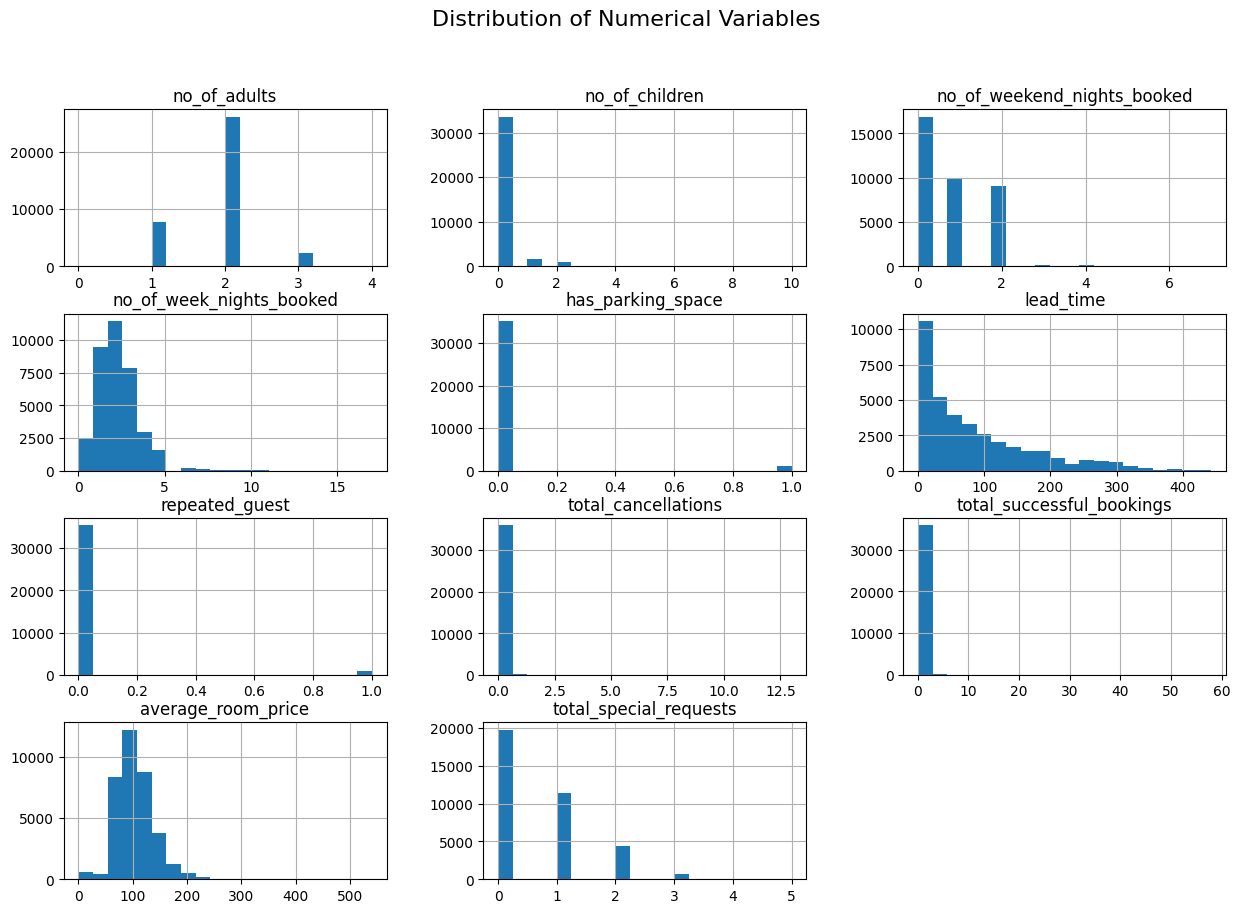

In [55]:
# Check the distribution of numerical variables
num_cols = [
    'no_of_adults', 'no_of_children', 'no_of_weekend_nights_booked',
    'no_of_week_nights_booked', 'has_parking_space', 'lead_time',
    'repeated_guest', 'total_cancellations', 'total_successful_bookings',
    'average_room_price', 'total_special_requests'
]

df_num = df_clean[num_cols]
df_num.hist(bins=20, figsize=(15, 10))
plt.suptitle('Distribution of Numerical Variables', fontsize=16)
plt.show()

In [76]:
# Calculate percentage of booking status
booking_status_pct = df_clean['booking_status'].value_counts(
    normalize=True).reset_index()
booking_status_pct.columns = ['booking_status', 'percentage']
booking_status_pct['percentage'] = booking_status_pct['percentage'] * 100

# Plot histogram
fig = px.bar(booking_status_pct,
             x='booking_status',
             y='percentage',
             text='percentage',
             color='booking_status')
fig.update_layout(title='Booking Status Distribution')
fig.update_traces(texttemplate='%{text:.2f}%', textposition='outside')
fig.show()

In [ ]:
import plotly.graph_objects as go

# Group the data by market segment type and count the number of bookings
market_segment_data = df_clean.groupby(
    'market_segment')['Booking_ID'].count().reset_index()

# Calculate the percentage of bookings for each market segment
market_segment_data['percentage'] = (market_segment_data['Booking_ID'] / market_segment_data['Booking_ID'].sum()) * 100

# Create a bar chart of the count of bookings by market segment type
fig = go.Figure(
    go.Bar(
        x=market_segment_data['market_segment'],
        y=market_segment_data['Booking_ID'],
        text=market_segment_data['percentage'].round(2).astype(str) + '%',
        textposition='auto',
        marker_color='darkblue'
    )
)

fig.update_layout(
    title='Count of Bookings by Market Segment Type',
    xaxis_title='Market Segment Type',
    yaxis_title='Count of Bookings',
    font=dict(
        family='Arial, sans-serif',
        size=14,
        color='#000000'
    )
)

fig.show()


In [ ]:
import plotly.express as px

# Group the data by market segment type and count the number of bookings for each booking status
market_segment_data = df_clean.groupby(['booking_status', 'market_segment'])['Booking_ID'].count().reset_index()

# Calculate the percentage of bookings for each market segment
market_segment_data['percentage'] = (market_segment_data['Booking_ID'] / market_segment_data.groupby(['booking_status'])['Booking_ID'].transform('sum')) * 100

# Create a bar chart of the count of bookings by market segment type and booking status
fig = px.bar(market_segment_data,
             x='market_segment',
             y='Booking_ID',
             color='booking_status',
             facet_col='booking_status',
             text=market_segment_data['percentage'].round(2).astype(str) + '%',
             labels={
                 'market_segment': 'Market Segment Type',
                 'Booking_ID': 'Count of Bookings'
             },
             title='Count of Bookings by Market Segment Type and Booking Status',
             color_discrete_sequence=['#f9bc86', '#a3acff']
)

fig.update_traces(textposition='auto')

fig.show()


In [59]:
fig = px.histogram(df_clean,
                   x="lead_time",
                   labels={
                       'lead_time': 'Lead Time (days)',
                       'count': 'Count'
                   },
                   title='Distribution of Bookings by Lead Time')

fig.update_traces(marker_color='#1f77b4')
fig.show()

In [60]:
fig = px.histogram(df_clean,
                   x="lead_time",
                   y="arrival_date_time",
                   labels={
                       'lead_time': 'Lead Time',
                       'arrival_date_time': 'Arrival Date Time'
                   },
                   title='Bookings by Lead Time and Arrival Date Time')
fig.show()

In [61]:
import pandas as pd
import plotly.express as px
import plotly.graph_objs as go

# Convert 'arrival_date_time' to datetime format
df_clean['arrival_date_time'] = pd.to_datetime(df_clean['arrival_date_time'], errors='coerce')

# Filter out rows with missing or invalid datetime values
df_clean = df_clean.dropna(subset=['arrival_date_time'])

# Extract month and year from 'arrival_date_time'
df_clean['month_year'] = df_clean['arrival_date_time'].dt.strftime('%b %Y')

# Group the DataFrame by 'month_year' and calculate the mean of 'lead_time'
mean_lead_time = df_clean.groupby('month_year')['lead_time'].mean().reset_index()

# Create bar chart
fig = px.bar(mean_lead_time, x='lead_time', y='month_year', orientation='h', 
             title='Average Lead Time by Arrival Month Year')

# Define the desired order of categories in the y-axis
desired_order = sorted(mean_lead_time['month_year'].unique(), key=lambda x: pd.to_datetime(x, format='%b %Y'))

# Update layout
fig.update_layout(
    font=dict(
        family='Arial, sans-serif',
        size=14,
        color='#000000'
    ),
    xaxis_title='Average Lead Time (days)',
    yaxis_title=None,
    yaxis=dict(categoryorder='array', categoryarray=desired_order)
)

# Add average lead time as text on the bars
fig.update_traces(text=mean_lead_time['lead_time'].round(2), textposition='inside')

fig.show()


In [62]:
# Create a box plot showing the lead time distribution for each market segment
fig = px.box(df_clean,
             x='market_segment',
             y='lead_time',
             title='Lead Time Distribution by Market Segment')

# Show the figure
fig.show()

In [63]:
# Group the data by market segment and lead time
market_lead_data = df_clean.groupby(['market_segment', 'lead_time'
                                     ]).size().reset_index(name='count')

# Create the subplots
fig = make_subplots(rows=1,
                    cols=len(market_lead_data['market_segment'].unique()),
                    shared_yaxes=True)

# Add each subplot
for i, segment in enumerate(market_lead_data['market_segment'].unique()):
    data = market_lead_data[market_lead_data['market_segment'] == segment]
    fig.add_trace(go.Scatter(x=data['lead_time'],
                             y=data['count'],
                             mode='lines',
                             name=segment),
                  row=1,
                  col=i + 1)

# Update the layout and display the figure
fig.update_layout(title='Bookings by Market Segment and Lead Time',
                  xaxis_title='Lead Time',
                  yaxis_title='Count')
fig.show()

In [64]:
# Create two histograms showing the distribution of no_of_weekend_nights and no_of_week_nights
fig1 = px.histogram(df_clean,
                    x='no_of_weekend_nights_booked',
                    nbins=20,
                    title='Distribution of No. of Weekend Nights')
fig2 = px.histogram(df_clean,
                    x='no_of_week_nights_booked',
                    nbins=20,
                    title='Distribution of No. of Week Nights')

# Create a figure with two subplots
fig = make_subplots(rows=1,
                    cols=2,
                    subplot_titles=('Weekend Nights', 'Week Nights'))

# Add the histograms to the subplots
fig.add_trace(fig1['data'][0], row=1, col=1)
fig.add_trace(fig2['data'][0], row=1, col=2)

# Update the layout
fig.update_layout(showlegend=False)

# Show the figure
fig.show()

In [65]:
# Create two histograms showing the distribution of no_of_weekend_nights and no_of_week_nights
fig1 = px.histogram(df_clean,
                    x='no_of_weekend_nights_booked',
                    nbins=17,
                    title='Distribution of No. of Weekend Nights')
fig2 = px.histogram(df_clean,
                    x='no_of_week_nights_booked',
                    nbins=17,
                    title='Distribution of No. of Week Nights')

# Set the x-axis range for both subplots
x_axis_range = (0, 17)

# Create a figure with two subplots
fig = make_subplots(rows=1,
                    cols=2,
                    subplot_titles=('Weekend Nights', 'Week Nights'))

# Add the histograms to the subplots
fig.add_trace(fig1['data'][0], row=1, col=1)
fig.add_trace(fig2['data'][0], row=1, col=2)

# Update the layout of the subplots
fig.update_xaxes(range=x_axis_range, row=1, col=1)
fig.update_xaxes(range=x_axis_range, row=1, col=2)

# Update the layout of the figure
fig.update_layout(showlegend=False)

# Show the figure
fig.show()

In [70]:
# Create a scatter plot for no_of_week_nights
fig1 = px.scatter(
    df_clean,  
    x='average_room_price', 
    y='no_of_week_nights_booked',  
    color='meal_plan_type',  
    size='no_of_adults',  
    hover_data=['reserved_room_type']
)

# Set the title and axis labels
fig1.update_layout(
    title='Scatter Plot of Average Room Price and Number of Week Nights',
    xaxis_title='Average Room Price',
    yaxis_title='Number of Week Nights'
)

# Show the plot
fig1.show()

# Create a scatter plot for no_of_weekend_nights
fig2 = px.scatter(
    df_clean,  
    x='average_room_price', 
    y='no_of_weekend_nights_booked',  
    color='meal_plan_type',  
    size='no_of_adults',  
    hover_data=['reserved_room_type']
)

# Set the title and axis labels
fig2.update_layout(
    title='Scatter Plot of Average Room Price and Number of Weekend Nights',
    xaxis_title='Average Room Price',
    yaxis_title='Number of Weekend Nights'
)

# Show the plot
fig2.show()


In [71]:
# Group the data by no_of_weekend_nights and lead time
weekend_lead_data = df_clean.groupby(['no_of_weekend_nights_booked', 'lead_time'
                                      ]).size().reset_index(name='count')

# Group the data by no_of_week_nights and lead time
week_lead_data = df_clean.groupby(['no_of_week_nights_booked', 'lead_time'
                                   ]).size().reset_index(name='count')

# Create the subplots
fig = make_subplots(rows=1, cols=2, shared_yaxes=True)

# Add each subplot
fig.add_trace(go.Scatter(x=weekend_lead_data['lead_time'],
                         y=weekend_lead_data['count'],
                         mode='markers',
                         name='Weekend Nights'),
              row=1,
              col=1)
fig.add_trace(go.Scatter(x=week_lead_data['lead_time'],
                         y=week_lead_data['count'],
                         mode='markers',
                         name='Week Nights'),
              row=1,
              col=2)

# Update the layout and display the figure
fig.update_layout(title='Bookings by Lead Time and No. of Nights',
                  xaxis_title='Lead Time',
                  yaxis_title='Count')
fig.show()

In [72]:
# Calculate correlation matrix
corr_matrix = df_clean[num_cols].corr()

# Filter matrix to show only strong positive and negative correlations
strong_corr_matrix = np.where((corr_matrix >= 0.5) | (corr_matrix <= -0.5),
                              corr_matrix, np.nan)

# Plot heatmap
fig = px.imshow(strong_corr_matrix,
                labels=dict(x="Numeric Variables", y="Numeric Variables"),
                x=num_cols,
                y=num_cols,
                color_continuous_scale='RdBu',
                width=1000,
                height=700,
                zmin=-1,
                zmax=1,
                title='Correlation')

fig.update_layout(title='Correlation Between Numeric Variables', title_x=0.5)

# Add annotations to heatmap squares
annotations = []
for i in range(len(num_cols)):
    for j in range(len(num_cols)):
        if i != j:
            if np.isnan(strong_corr_matrix[i][j]):
                text = "-"
            else:
                text = f"{strong_corr_matrix[i][j]:.2f}"
            annotations.append(
                dict(x=num_cols[j], y=num_cols[i], text=text, showarrow=False))
fig.update_layout(annotations=annotations)

fig.show()

In [73]:
fig = px.scatter(
    df_clean,
    x='total_successful_bookings',
    y='repeated_guest',
    trendline='ols',
    trendline_color_override='red',
    title=
    'Relationship between No. of Previous Bookings Not Canceled and Repeated Guest'
)

fig.update_layout(xaxis_title='No. of Previous Bookings Not Canceled',
                  yaxis_title='Repeated Guest')

fig.show()

In [74]:
df_clean.columns

Index(['Booking_ID', 'no_of_adults', 'no_of_children',
       'no_of_weekend_nights_booked', 'no_of_week_nights_booked',
       'meal_plan_type', 'has_parking_space', 'reserved_room_type',
       'lead_time', 'arrival_year', 'arrival_month', 'arrival_date',
       'market_segment', 'repeated_guest', 'total_cancellations',
       'total_successful_bookings', 'average_room_price',
       'total_special_requests', 'booking_status', 'arrival_date_time',
       'month_year'],
      dtype='object')

In [75]:
# Define the list of categorical columns to plot
cat_cols = ['meal_plan_type', 'reserved_room_type', 'market_segment']

# Create a subplot for each column
fig = make_subplots(rows=1, cols=len(cat_cols), subplot_titles=cat_cols)

# Add each categorical variable countplot to the subplot
for i, col in enumerate(cat_cols):
    # Compute the count for each category
    data = df_clean[col].value_counts().reset_index()
    data.columns = [col, 'count']
    # Add the countplot to the subplot
    fig.add_trace(px.bar(data, x=col, y='count').data[0], row=1, col=i + 1)

# Update the layout and display the figure
fig.update_layout(title='Distribution of Categorical Variables',
                  showlegend=False)
fig.show()

Data source:https://www.kaggle.com/datasets/ahsan81/hotel-reservations-classification-dataset